In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import calendar
from datetime import datetime
from datetime import date
from functions import fit_quad, fit_sc, fit_combined, fit_lin

Download data

In [27]:
natgas = pd.read_csv("Nat_Gas.csv")
natgas

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


Set up dates
1. Convert string dates to datetime objects

Dates are listed from October 31st 2020 to September 30th 2024. For the purpose of the model fitting, I will assign indices to the dates as they occur at monthly intervals. 0 - 47 where 0 == 10/2020 and 47 == 9/2024

2. Set up ranges for x domain (time), spanning 48 months
3. Set up ranges for x domain for + 1 yr in advance, spanning 60 months

In [28]:
dates = []
prices = []

for n in range(natgas["Dates"].size):
    date_str = natgas["Dates"].iloc[n]
    date_format = '%m/%d/%y'
    date_obj = datetime.strptime(date_str, date_format).date()
    dates.append(date_obj)
    prices.append(natgas["Prices"].iloc[n])

dates

[datetime.date(2020, 10, 31),
 datetime.date(2020, 11, 30),
 datetime.date(2020, 12, 31),
 datetime.date(2021, 1, 31),
 datetime.date(2021, 2, 28),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 4, 30),
 datetime.date(2021, 5, 31),
 datetime.date(2021, 6, 30),
 datetime.date(2021, 7, 31),
 datetime.date(2021, 8, 31),
 datetime.date(2021, 9, 30),
 datetime.date(2021, 10, 31),
 datetime.date(2021, 11, 30),
 datetime.date(2021, 12, 31),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 28),
 datetime.date(2022, 3, 31),
 datetime.date(2022, 4, 30),
 datetime.date(2022, 5, 31),
 datetime.date(2022, 6, 30),
 datetime.date(2022, 7, 31),
 datetime.date(2022, 8, 31),
 datetime.date(2022, 9, 30),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 11, 30),
 datetime.date(2022, 12, 31),
 datetime.date(2023, 1, 31),
 datetime.date(2023, 2, 28),
 datetime.date(2023, 3, 31),
 datetime.date(2023, 4, 30),
 datetime.date(2023, 5, 31),
 datetime.date(2023, 6, 30),
 datetime.date(2023, 7, 31),
 date

In [29]:
dates_future = []
start = date(2024,10,31) 
k = 12
 
for month in range(k):
    year = start.year + (start.month + month - 1) // 12
    new_month = (start.month + month - 1) % 12 + 1
    new_day = min(start.day, calendar.monthrange(year, new_month)[1])
    new_date = date(year, new_month, new_day)
    dates_future.append(new_date)

new_dates = dates + dates_future

In [30]:
date_num = np.arange(len(dates))
date_num_new = np.arange(len(new_dates))

Plot data in scatter diagram

C:\Users\UKLDC004\AppData\Local\Temp\ipykernel_10484\2546021343.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


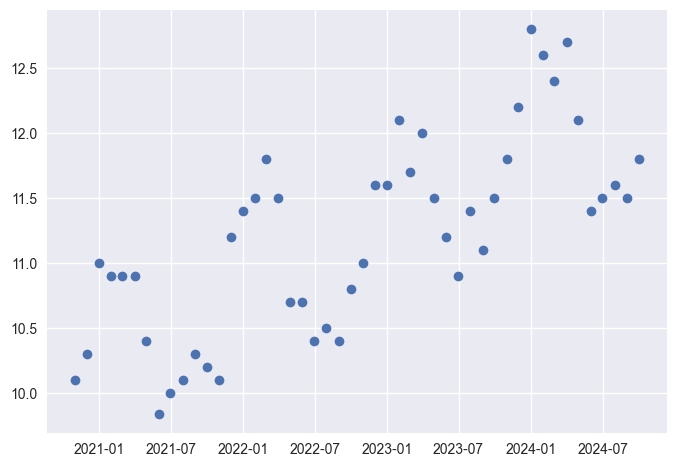

In [31]:
plt.style.use("seaborn")
plt.plot_date(dates, prices)
plt.tight_layout
plt.show()

First test if a linear or quadratic model fits the data better

Linear Fit:

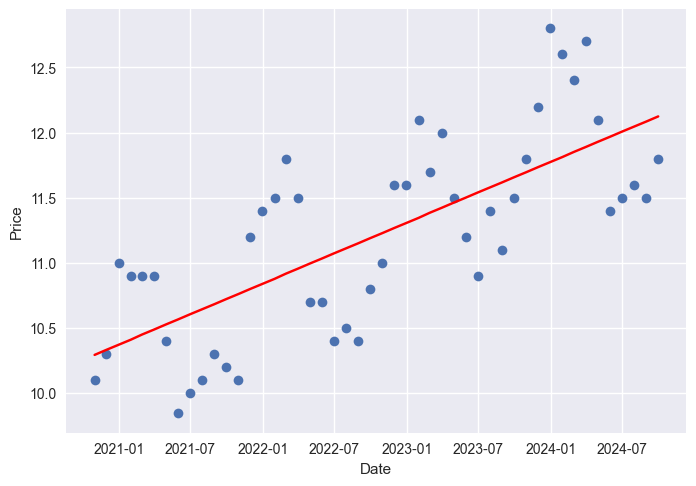

In [32]:
yvalues_lin = fit_lin(prices, 48)

plt.plot_date(dates, prices)
plt.plot(dates, yvalues_lin, color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout
plt.show()


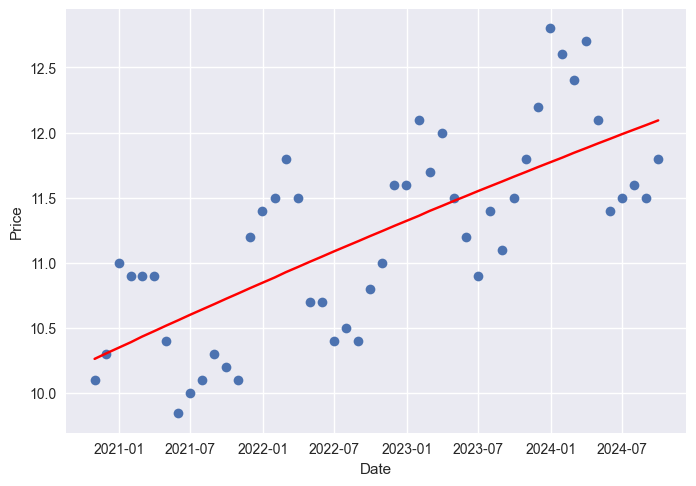

In [33]:
yvalues_quad = fit_quad(prices, 48)

plt.plot_date(dates, prices)
plt.plot(dates, yvalues_quad, color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout
plt.show()

In [34]:
SSE_lin = np.linalg.norm(prices - yvalues_lin)**2
MSE_lin = SSE_lin/(np.size(prices))
SSE_quad = np.linalg.norm(prices - yvalues_quad)**2
MSE_quad = SSE_quad/(np.size(prices))

print("Sum of squared error for linear model is: ", np.round_(SSE_lin, 2))
print("Mean squared error for linear model is: ", np.round_(MSE_lin, 2))
print("Sum of squared error for quadratic model is: ", np.round_(SSE_quad,2))
print("Mean squared error for quadratic model is: ", np.round_(MSE_quad, 2))

Sum of squared error for linear model is:  12.98
Mean squared error for linear model is:  0.27
Sum of squared error for quadratic model is:  12.97
Mean squared error for quadratic model is:  0.27


F-test:

H0: There is no significant difference between the goodness of fit of the two models
H1: There is a significant difference between the goodness of fit of the two models

significance level: 5%

Degrees of freedom:
linear v: 48 - 2 - 1 = 45
quadratic v: 48 - 3 - 1 = 44

F-statistic:
((12.98 - 12.97)/(45 - 44)) / (12.98/45) = (0.01/1)/0.29477273 = 0.033924

P-value:
df_num = 